In [1]:
%pylab inline
import random
from scipy.stats import pearsonr
from scipy.integrate import quad
from scipy.special import expi

Populating the interactive namespace from numpy and matplotlib


# Task 1

### a,

Just playing around and checking how this appears on the new github branch

In [2]:
def rng(x,a,b,m):
    return mod(a*x+b,m)

In [15]:
sequence = numpy.zeros(20000)
sequence[0] = 4
for i in range (19999):
    sequence[i+1] = rng(sequence[i],424,2,652) #rng(sequence[i],16807,0,2147483647) # The least good from the notes

Text(0, 0.5, '$u_n$')

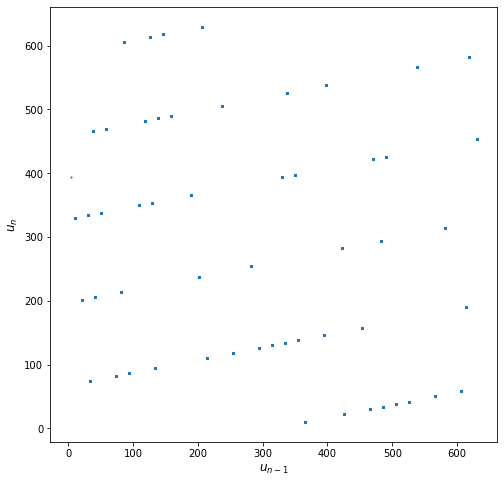

In [16]:
figsize(8,8)
scatter(sequence[0:-1],sequence[1:],s=2,alpha=0.7)
xlabel(r'$u_{n-1}$',fontsize=12)
ylabel(r'$u_n$', fontsize=12)

$$ C = \frac{N\sum_{n=2}^N (u_n - <u>)(u_{n-1} - <u>)}{(N-1)\sum^N_{n=1}(u_n-<u>)^2} $$

In [6]:
def correlation_coeff(seq,N):
    denom = N * numpy.sum(numpy.multiply(seq[1:N] - numpy.average(seq),seq[:N-1] - numpy.average(seq)))
    num = (N-1) * numpy.sum(numpy.square(seq[:N] - numpy.average(seq)))
    return denom / num

In [7]:
corrs = numpy.zeros(200)
for i in range (2,202):
    corrs[i-2] = correlation_coeff(sequence,i)

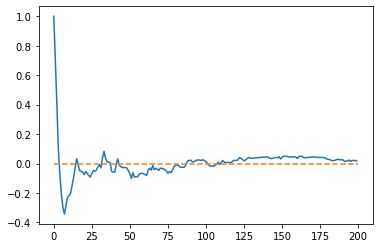

In [8]:
plot(corrs)
plot([0,200],[0,0],'--')

Create the histogram of the normalised values

(800.0, 1200.0)

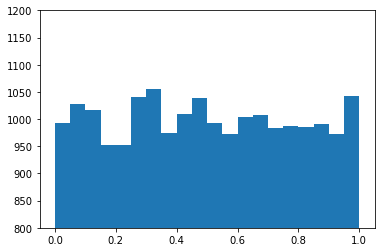

In [9]:
h = plt.hist(sequence/max(sequence),20)
plt.ylim(800,1200)

In [10]:
corr, _ = pearsonr(sequence[:10], sequence[10:20])

In [11]:
corr

-0.6126391658289855

### b,

In [12]:
sequence1 = numpy.zeros(20000)
sequence2 = numpy.zeros(20000)
sequence1[0] = 4
sequence2[0] = 30
for i in range (19999):
    sequence1[i+1] = rng(sequence1[i],16807,0,2147483647) # The least good from the notes
    sequence2[i+1] = rng(sequence2[i],1103515245,1234,2**31) # The C RNG

In [13]:
def sample_rng(seq1,seq2):
    final_seq = []
    for i in range(seq1.shape[0]):
        if ((mod(seq2[i],3) == 0)):
        #if ((mod(seq2[i],2) == 0) or (mod(seq2[i],3) == 0) or (mod(seq2[i],5) == 0)
        #    or (mod(seq2[i],7) == 0) or (mod(seq2[i],13) == 0)):
            final_seq.append(seq1[i])
    return array(final_seq)

In [14]:
fin_seq = sample_rng(sequence1, sequence2)

In [15]:
corrs = numpy.zeros(200)
for i in range (2,202):
    corrs[i-2] = correlation_coeff(fin_seq,i)

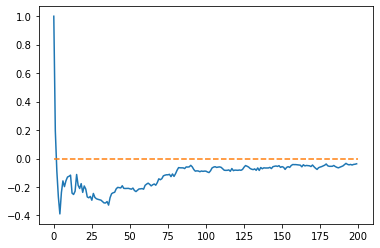

In [16]:
plot(corrs)
plot([0,200],[0,0],'--')

# Task 2

In [17]:
def func(x,n):
    return n/np.sqrt(np.pi)*np.exp(-x**2*n**2)

Integration by rejection

In [18]:
def isbelow(x_i,y_i,n):
    if func(x_i,n) > y_i:
        return True
    else:
        return False

In [21]:
aa = linspace(-1,1,2000)

In [22]:
x_i = []
y_i = []
i = 0
while i < 50000:
    x_i.append(random.uniform(-1,1))
    y_i.append(random.random())
    i+=1

bool_list = func(array(x_i),30)/max(func(aa,30)) > y_i   # Normalized by the maximum

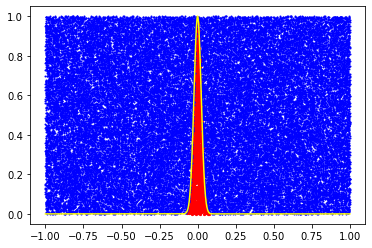

In [23]:
plot(aa,func(aa,30)/max(func(aa,30)),color='yellow')
scatter(array(x_i)[bool_list], array(y_i)[bool_list], color='red', s = 5)
scatter(array(x_i)[~bool_list], array(y_i)[~bool_list], color='blue', s = 1)

In [24]:
quad(func,-1,1,30) # The n=30 is within the 10^-5 error limit

(1.0000000000000002, 4.782350177760103e-11)

In [25]:
area = numpy.sum(bool_list)/len(bool_list) * 2 * max(func(aa,30)) # 2 is the area of the rectangle, we have to multiply with the
                                                                  # normalisation factor

In [26]:
#Do this is a loop

In [27]:
areas = []
for j in range (1000):
    x_i = []
    y_i = []
    i = 0
    while i < 50000:
        x_i.append(random.uniform(-1,1))
        y_i.append(random.random())
        i+=1

    bool_list = func(array(x_i),30)/max(func(aa,30)) > y_i
    areas.append(numpy.sum(bool_list)/len(bool_list) * 2 * max(func(aa,30)))

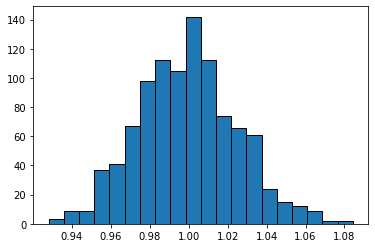

In [28]:
h1 = plt.hist(areas,20,edgecolor='black')

Integration by mean value

In [29]:
areas2 = []
for i in range (1000):
    x_i = []
    i = 0
    while i < 50000:
        x_i.append(random.uniform(-1,1))
        i+=1
        
    areas2.append(numpy.average(func(array(x_i),30))*(1-(-1)))         

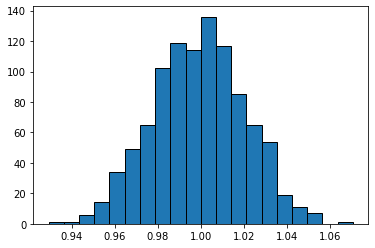

In [30]:
h1 = plt.hist(areas2,20,edgecolor='black')

With integral trasformation

Let $y = e^{-x^2}$, so that $f(y,n) = \frac{n}{\sqrt{\pi}}y^{n^2}$
On this way the integration will become
$$ \frac{1}{\sqrt{\pi}} \int^{e^{-1}}_1 \frac{1}{\sqrt{-\mathrm{ln} y}} dy $$

In [225]:
def mod_func(y,n):
    return -1/np.sqrt(np.pi)/(np.sqrt(-log(y)))

In [226]:
y_i = []
i = 0
while i < 50000:
    y_i.append(random.uniform(np.exp(-1),1))
    i+=1

In [228]:
numpy.average(mod_func(array(y_i),30))*((np.exp(-1))-1)

0.8460782167118351

# Task 3

### a,

In [17]:
i = 0
tauvals = []
while i < 2000:
    tauvals.append(np.random.exponential(1/10))
    i+=1 

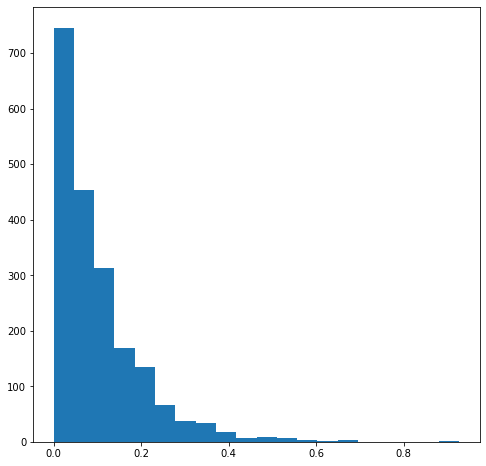

In [18]:
h = plt.hist(tauvals,20)

In [19]:
i = 0
muvals = []
while i < 10000:
    muvals.append(np.random.triangular(0,1,1))
    i+=1 

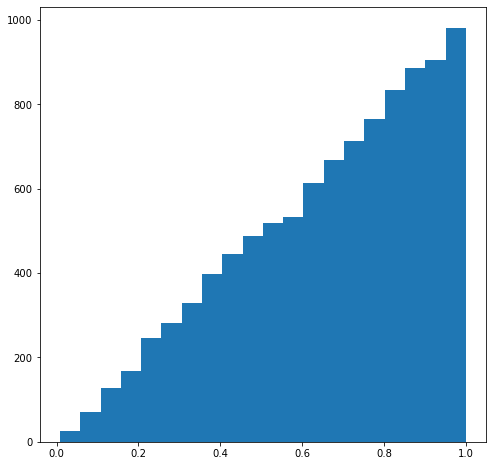

In [20]:
h = plt.hist(muvals,20)

Inverse transform sampling for the $\mu$ distribution

In [21]:
y = np.random.rand(10000)
x = np.sqrt(y)

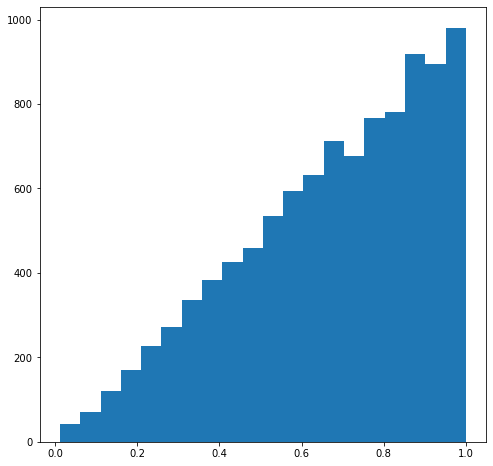

In [22]:
h = plt.hist(x,20)

### c,

In [27]:
while True:
    mu_init = np.random.triangular(0,1,1)
    tau_init = np.random.exponential()

    tau_r = []

    tau_r.append(40)

    tau_r.append(tau_r[0] - tau_init * mu_init)

    j = 1
    while tau_r[j] > 0 and tau_r[j] < 40:
        mu = np.random.uniform(-1,1)
        tau = np.random.exponential()

        tau_r.append(tau_r[j] - tau * mu)
        j+=1
    if array(tau_r)[-1] > 0:
        continue
    else:
        break

(41.0, -1.0)

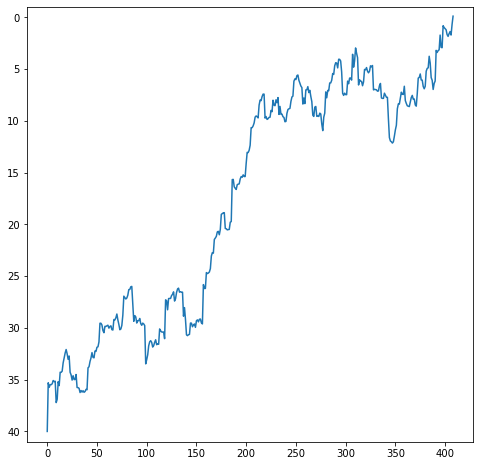

In [28]:
plot(tau_r)
ylim(41,-1)

In [29]:
40**2

1600

### d,

In [34]:
mus = []
for i in range (20000):
    
    while True:
        mu_init = np.random.triangular(0,1,1)
        tau_init = np.random.exponential()

        tau_r = []

        tau_r.append(10)

        tau_r.append(tau_r[0] - tau_init * mu_init)

        j = 1
        while tau_r[j] > 0 and tau_r[j] < 10:
            mu = np.random.uniform(-1,1)
            tau = np.random.exponential()

            tau_r.append(tau_r[j] - tau * mu)
            j+=1
        if array(tau_r)[-1] > 0:
            continue
        else:
            mu_final = mu
            break
            
    mus.append(mu_final)

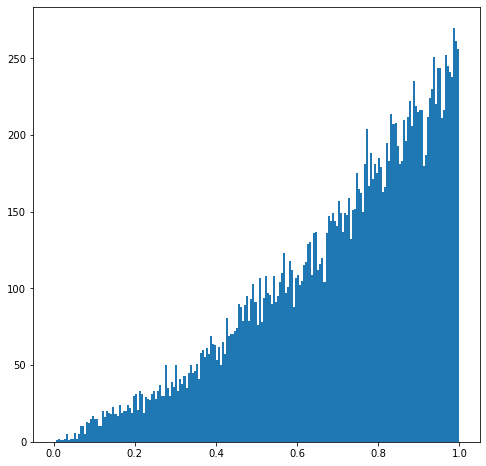

In [38]:
h = plt.hist(mus,200,[0,1])

In [39]:
I_mu = numpy.divide(h[0],h[1][0:-1]+ediff1d(h[1]))  # Divide the N values with the corresponing mu values

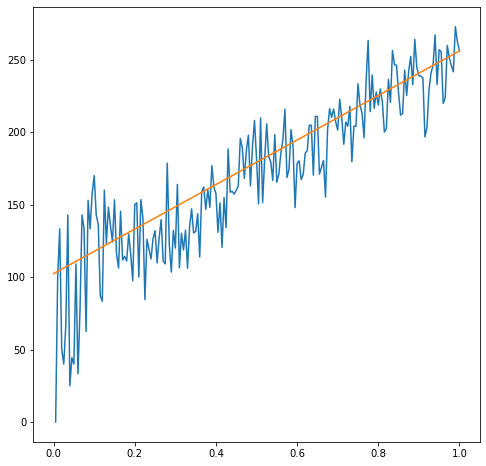

In [40]:
plot(h[1][0:-1]+ediff1d(h[1]),I_mu)
aa = linspace(0,1,100)
plot(aa,(I_mu[-1])*(0.4+0.6*aa))

# Task 4

### a,

In [2]:
L = 10
# First initalize the Monte Carlo packet positions and their directions
N = 50000
x = numpy.zeros(N)
mu = numpy.zeros(N)
i = 0

while i < N:
    x[i] = random.uniform(0,L)
    mu[i] = random.uniform(-1,1)
    i+=1

In [3]:
# Give them the step sizes 
i = 0
khi = 1      # Introduce optical depth here
taus = []   
while i < N:
    taus.append(np.random.exponential(1/khi)*khi)  # Draw a path (exponential), then scale it with the optical depth, to get the tau values
    i+=1 
taus = array(taus)

In [130]:
# Now check how many of the photons escaped
bool_list = numpy.zeros(N)
for i in range (N):
    if taus[i] * mu[i] > (L - x[i]) * khi or taus[i] * mu[i] < -x[i] * khi:
        bool_list[i] = 1
x = x + numpy.multiply(taus,mu) * khi   # Modify the position with the non-optical path

In [131]:
escape_fraction = []
escape_fraction.append(sum(bool_list)/N)

In [132]:
# Now lets make a few another step, and see how many more photons escape; only update the ones that haven't escaped yet for the
# sake of optimization

j = 0
J = 100 # Number of epochs
while j < J:
    
    # We have the initial positions, draw a new set of directions and taus
    for i in range (N):
        if bool_list[i] == 0:
            mu[i] = random.uniform(-1,1)
            taus[i] = np.random.exponential(1/khi)*khi
        
    for i in range (N):
        if bool_list[i] == 0:
            if taus[i] * mu[i] > (L - x[i]) * khi or taus[i] * mu[i] < -x[i] * khi:
                bool_list[i] = 1
    cond = (bool_list == 0)
    x[cond] = x[cond] + numpy.multiply(taus[cond],mu[cond]) * khi 
    escape_fraction.append(sum(bool_list)/N)
    j+=1

Text(0, 0.5, 'Fraction of escaped photons')

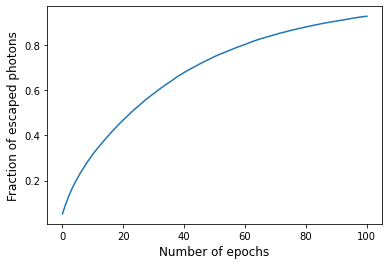

In [76]:
plot(escape_fraction)
xlabel('Number of epochs',fontsize=12)
ylabel('Fraction of escaped photons',fontsize=12)

Now that this works, set up a function for the whole thing

In [142]:
def escape_simul(L,khi,N):
    x = numpy.zeros(N)
    mu = numpy.zeros(N)
    taus = []  
    i = 0

    while i < N:
        x[i] = random.uniform(0,L)
        mu[i] = random.uniform(-1,1)
        taus.append(np.random.exponential(1/khi)*khi)
        i+=1
    taus = array(taus)
    
    bool_list = numpy.zeros(N)
    for i in range (N):
        if taus[i] * mu[i] > (L - x[i]) * khi or taus[i] * mu[i] < -x[i] * khi:
            bool_list[i] = 1
    x = x + numpy.multiply(taus,mu) * khi
    
    return sum(bool_list)/N

In [83]:
escaped = numpy.zeros((20,20))
khis = linspace(0.1,2,20)
Ls = linspace(2,30,20)
for i in range (20):
    for j in range (20):
        escaped[i,j] = escape_simul(Ls[i],khis[j],30000)

Text(0, 0.5, 'L')

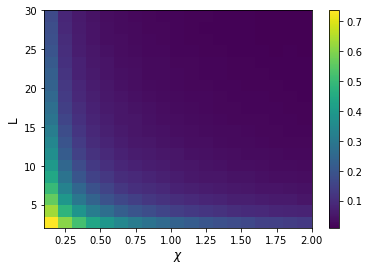

In [91]:
xs, ys = meshgrid(khis,Ls)
pcolormesh(xs,ys,escaped)
colorbar()
xlabel(r'$\chi$',fontsize=12)
ylabel('L',fontsize=12)

### b,

Error estimation: run the MC with the same initial values many times, then calculate the standard deviation of the results, then scale it according to the number of packets:
$$ \sigma_M = \frac{\sigma}{\sqrt{N}} $$
This is the estimated standard error (ESE)

In [92]:
N = 30000
escape_fracs = []
for i in range (300):
    escape_fracs.append(escape_simul(7,0.5,N))

In [97]:
print('Fraction of escaped photons = %.5f$ +- %.7f$' % (numpy.average(escape_fracs), numpy.std(escape_fracs)/sqrt(N) ))

Fraction of escaped photons = 0.14127$ +- 0.0000112$


In [143]:
N = 5000
escape_fracs = []
for i in range (300):
    escape_fracs.append(escape_simul(7,0.5,N))

In [144]:
print('Fraction of escaped photons = %.5f$ +- %.7f$' % (numpy.average(escape_fracs), numpy.std(escape_fracs)/sqrt(N)))

Fraction of escaped photons = 0.14149$ +- 0.0000691$


### c,

In [119]:
def Pesc(khi,L):
    tau = khi * L
    Ei = expi(-tau)
    Pesc = 1/(2*tau)*(1+exp(-tau)*(tau-1+tau**2*exp(tau)*Ei))
    return Pesc

In [120]:
Pesc(0.5,7) # Yep, they do agree

0.14144417790011835

# Task 5

In [40]:
N = 10000 # Number of packets
Eps_tot = 1e8 # Total initial energy
khi = 1e2
L = 1
dt = 5e-13
#dt = 1e-12  # in s
c = 3e10 # in cm/s


e_packets = numpy.zeros(N)
e_packets[:] = Eps_tot / N
x = numpy.zeros(N)
mu = numpy.zeros(N)
l = numpy.zeros(N)  # Distances till the next interaction        
        
for t in range (101):
    for i in range (N):
        tot_l = 0
        while tot_l < c*dt:
            if tot_l > 0:
                x[i] = x[i] + l * mu
            mu = random.uniform(-1,1)
            l = np.random.exponential(1/khi)
            tot_l += l
        x[i] = x[i] + (tot_l - c*dt) * mu

    if t == 10:
        snap1 = x.copy()
    if t == 22:
        snap2 = x.copy()
    if t == 40:
        snap3 = x.copy()
    if t == 100:
        snap4 = x.copy()

In [41]:
def analytic_E(x,t,khi,Eps):
    D = c/(3*khi)
    return Eps * 1 / (np.sqrt(4*np.pi*D*t)) * np.exp(-x**2/(4*D*t))

In [42]:
def nice_hist(data, bins, range, wgh):
    n, bins = np.histogram(data, bins, range, weights = wgh)
    bb = np.empty((bins.shape[0] - 1) * 2)
    nn = np.empty(bb.shape)
    bb[::2] = bins[:-1]
    bb[1::2] = bins[1:]
    nn[::2] = n
    nn[1::2] = n
    return nn, bb, np.max(n)

(-0.5, 0.5)

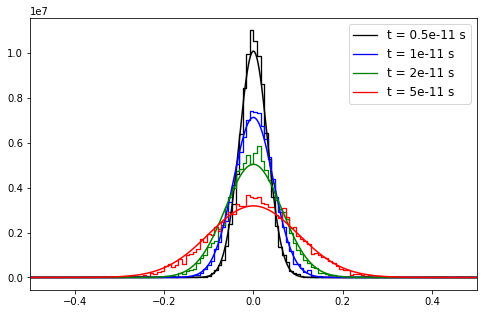

In [46]:
figsize(8,5)
M=150
#h1, b1, n1 = nice_hist(snap,50,[-0.1,0.1],  e_packets)
#plot(b1, h1, 'k-',lw=1.3,label='t = 1e-13 s')
h1, b1, n1 = nice_hist(snap1,M,[-0.6,0.6], e_packets)
plot(b1, h1, 'k-',lw=1.3,label='t = 0.5e-11 s')
h2, b2, n2 = nice_hist(snap2,M,[-0.6,0.6],  e_packets)
plot(b2, h2, 'b-',lw=1.3,label='t = 1e-11 s')
h3, b3, n3 = nice_hist(snap3,M,[-0.6,0.6],  e_packets)
plot(b3, h3, 'g-',lw=1.3,label='t = 2e-11 s')
h4, b4, n4 = nice_hist(snap4,M,[-0.6,0.6],  e_packets)
plot(b4, h4, 'r-',lw=1.3,label='t = 5e-11 s')

legend(fontsize=12)

K = 125
aa = linspace(-0.5,0.5,2000)
plot(aa,analytic_E(aa, 0.5e-11,1e2,1e8)/K,'k-',lw=1.5)
plot(aa,analytic_E(aa, 1e-11,1e2,1e8)/K,'b-',lw=1.5)
plot(aa,analytic_E(aa, 2e-11,1e2,1e8)/K,'g-',lw=1.5)
plot(aa,analytic_E(aa, 5e-11,1e2,1e8)/K,'r-',lw=1.5)

xlim(-0.5,0.5)